In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import scipy.io as sio
from datetime import datetime, timedelta

In [31]:
# import data

# IRR for 7MW
IRR_7MW_standard = pd.read_csv(r'C:\Users\User\Documents\3YP\Matlab scripts\Solar comparison daily model v6\IRR_7MW_standard.csv', header = None)
IRR_7MW_standard = np.transpose(IRR_7MW_standard)
IRR_7MW_standard.columns = ['NPV']
Dreal_xaxis = np.linspace(0,20,201)
IRR_7MW_standard["xaxis"] = Dreal_xaxis
#IRR_7MW_standard.head(5)

# NPV for varying capacities
NPV_standard = pd.read_csv(r'C:\Users\User\Documents\3YP\Matlab scripts\Solar comparison daily model v6\NPV_caprange_standard.csv', header = None)
NPV_standard = np.transpose(NPV_standard)
NPV_standard.columns = ['NPV']
capacity_xaxis = np.linspace(0,15,1501)
NPV_standard["xaxis"] = capacity_xaxis
#NPV_standard.head(5)

# IRR for varying capacities
IRR_standard = pd.read_csv(r'C:\Users\User\Documents\3YP\Matlab scripts\Solar comparison daily model v6\IRR_caprange_standard.csv', header = None)
IRR_standard = np.transpose(IRR_standard)
IRR_standard.columns = ['IRR']
IRR_standard["xaxis"] = capacity_xaxis
#IRR_standard.head(5)

# IRR for 6MW solar farm
IRR_solarfarm_standard = pd.read_csv(r'C:\Users\User\Documents\3YP\Matlab scripts\Solar Farm Finance\IRR_solarfarm_standard.csv', header = None)
IRR_solarfarm_standard = np.transpose(IRR_solarfarm_standard)
IRR_solarfarm_standard.columns = ['NPV']
IRR_solarfarm_standard["xaxis"] = Dreal_xaxis
#IRR_solarfarm_standard.head(5)

# Heat flows for PV-T
pvt35flows = pd.read_csv(r'C:\Users\User\Documents\3YP\Matlab scripts\Solar comparison daily model v5\cap35pvtflows.csv', header = None)
pvt7flows = pd.read_csv(r'C:\Users\User\Documents\3YP\Matlab scripts\Solar comparison daily model v5\cap7pvtflows.csv', header = None)
pvt105flows = pd.read_csv(r'C:\Users\User\Documents\3YP\Matlab scripts\Solar comparison daily model v5\cap105pvtflows.csv', header = None)
pvt35flows.columns = ['SH total','DHW total','panel total','net demand','SH excess','DHW excess','ground flows']
pvt7flows.columns = ['SH total','DHW total','panel total','net demand','SH excess','DHW excess','ground flows']
pvt105flows.columns = ['SH total','DHW total','panel total','net demand','SH excess','DHW excess','ground flows']
datetime_daily = np.arange(datetime(2019,1,1), datetime(2020,1,1), timedelta(days=1)).astype(datetime)
pvt35flows["datetime"] = datetime_daily
pvt7flows["datetime"] = datetime_daily
pvt105flows["datetime"] = datetime_daily
#pvt7flows.tail(5)

In [8]:
# set x axis
# Dreal_xaxis = np.linspace(0,20,200)
# Dreal_xaxis
#IRR_standard.head()


IRR  xaxis
0  0.0   0.00
1  0.0   0.01
2  0.0   0.02
3  0.0   0.03
4  0.0   0.04

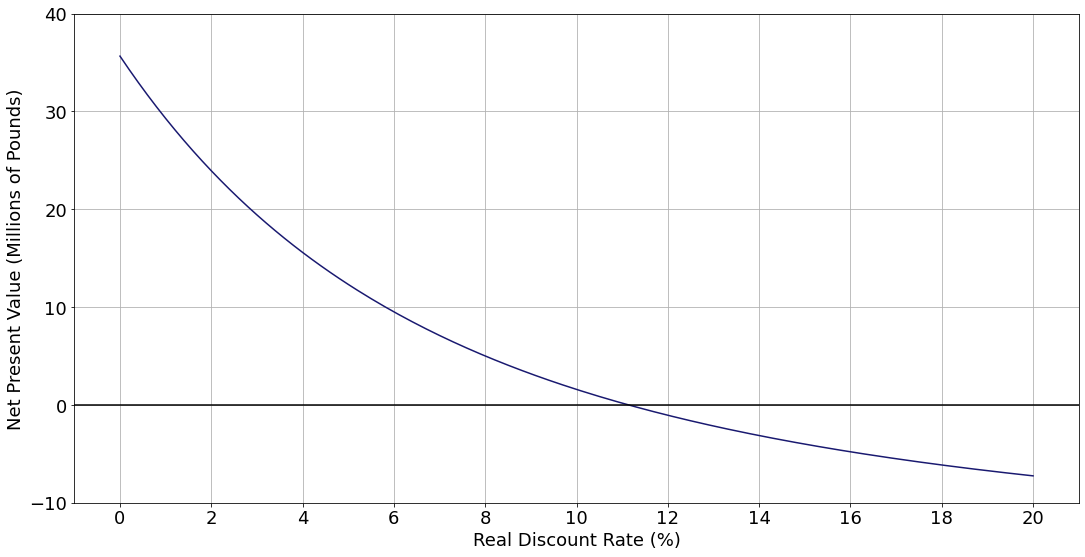

In [24]:
# plot IRR of 7MW in standard parameters
plt.figure(figsize=(18,9))
plt.plot(IRR_7MW_standard["xaxis"],IRR_7MW_standard["NPV"],'midnightblue')
plt.xlabel('Real Discount Rate (%)',fontsize=18)
plt.ylabel('Net Present Value (Millions of Pounds)',fontsize=18)
plt.axhline(y=0, c='k')
plt.xticks(np.arange(0, 21, 2.0),fontsize=18)
plt.yticks(np.arange(-10, 45, 10.0),fontsize=18)
plt.grid()
plt.show()

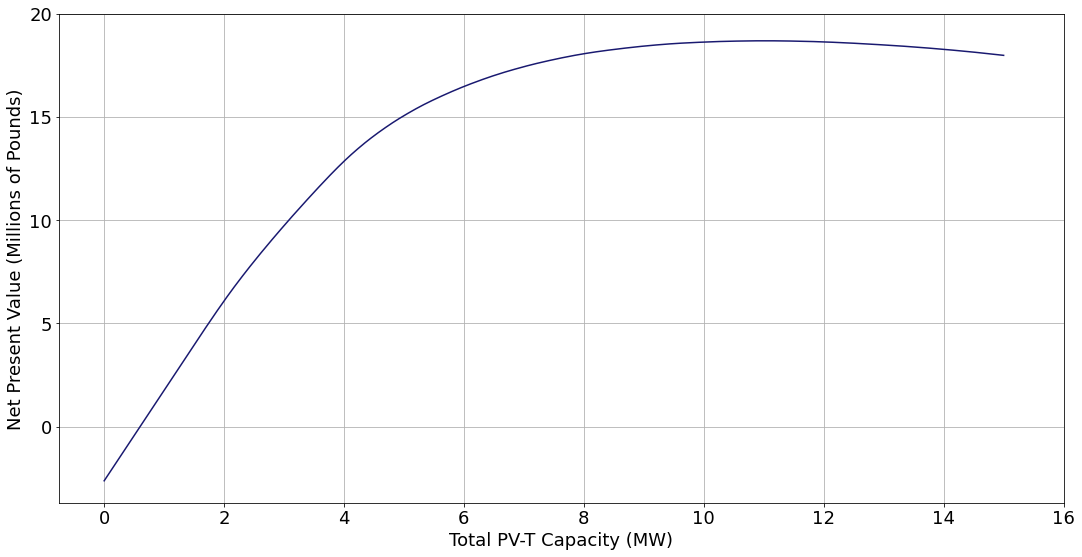

In [25]:
# plot NPV for varying capacities

plt.figure(figsize=(18,9))
plt.plot(NPV_standard["xaxis"],NPV_standard["NPV"],'midnightblue')
plt.xlabel('Total PV-T Capacity (MW)',fontsize=18)
plt.ylabel('Net Present Value (Millions of Pounds)',fontsize=18)
plt.xticks(np.arange(0, 17, 2.0),fontsize=18)
plt.yticks(np.arange(0, 21, 5.0),fontsize=18)
plt.grid()
plt.show()

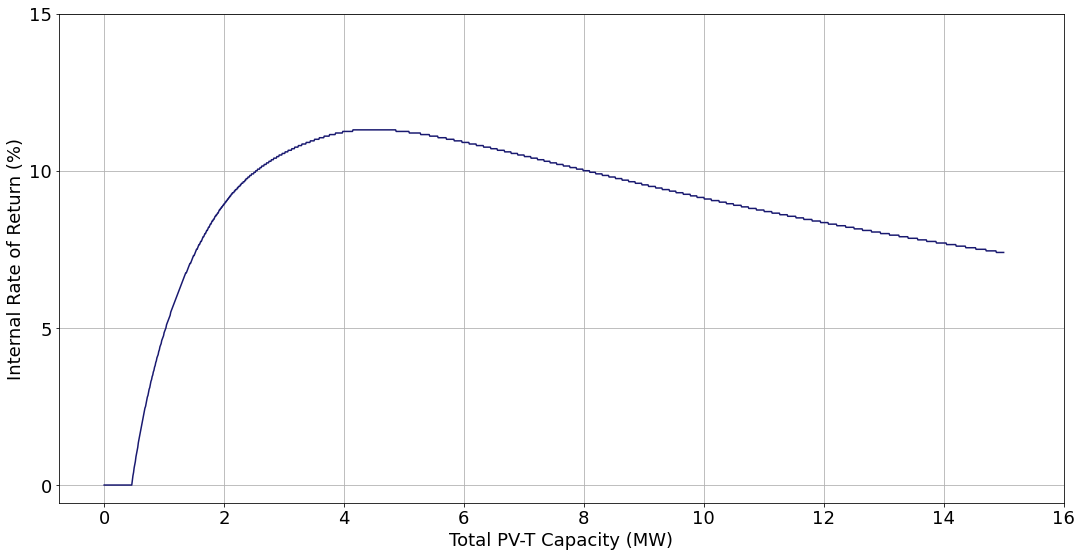

In [26]:
# IRR for varying capacities

plt.figure(figsize=(18,9))
plt.plot(IRR_standard["xaxis"],IRR_standard["IRR"],'midnightblue')
plt.xlabel('Total PV-T Capacity (MW)',fontsize=18)
plt.ylabel('Internal Rate of Return (%)',fontsize=18)
plt.xticks(np.arange(0, 17, 2.0),fontsize=18)
plt.yticks(np.arange(0, 16, 5.0),fontsize=18)
plt.grid()
plt.show()

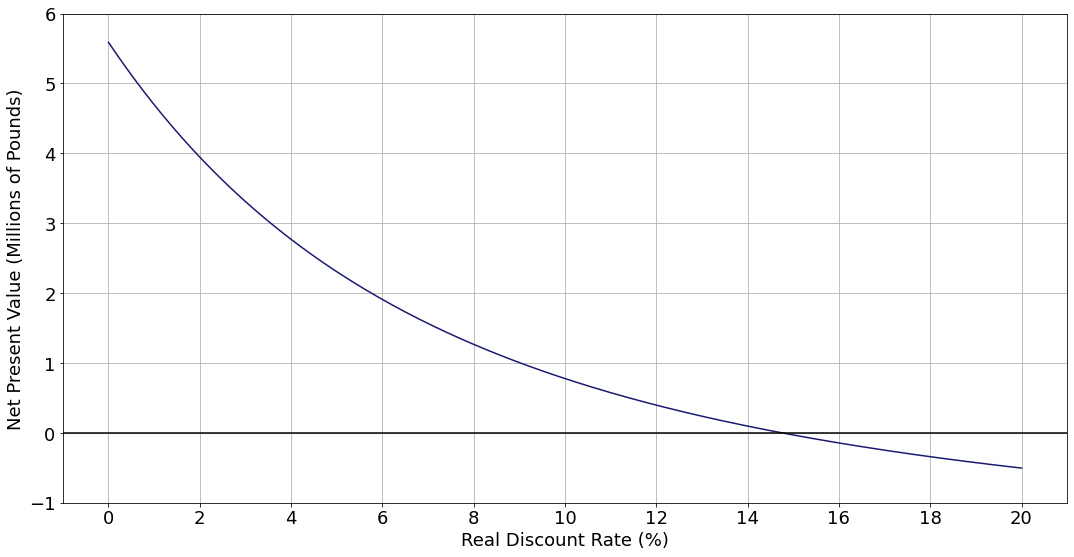

In [33]:
# show IRR for 6MW solar farm

plt.figure(figsize=(18,9))
plt.plot(IRR_solarfarm_standard["xaxis"],IRR_solarfarm_standard["NPV"],'midnightblue')
plt.xlabel('Real Discount Rate (%)',fontsize=18)
plt.ylabel('Net Present Value (Millions of Pounds)',fontsize=18)
plt.axhline(y=0, c='k')
plt.xticks(np.arange(0, 21, 2.0),fontsize=18)
plt.yticks(np.arange(-1, 7, 1.0),fontsize=18)
plt.grid()
plt.show()

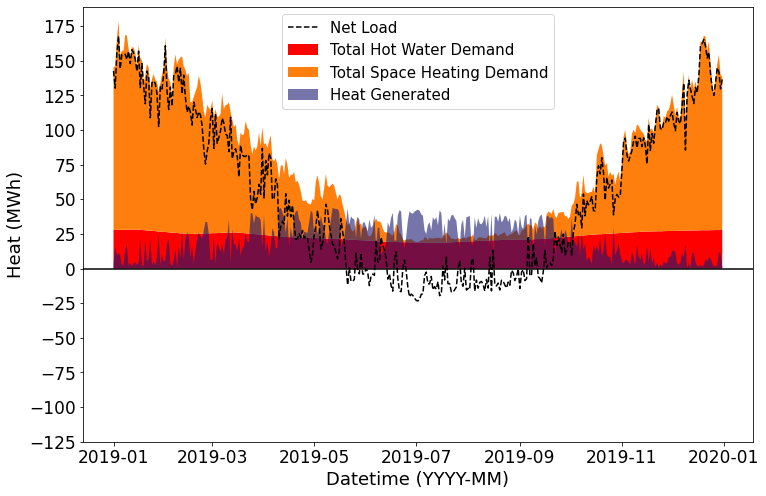

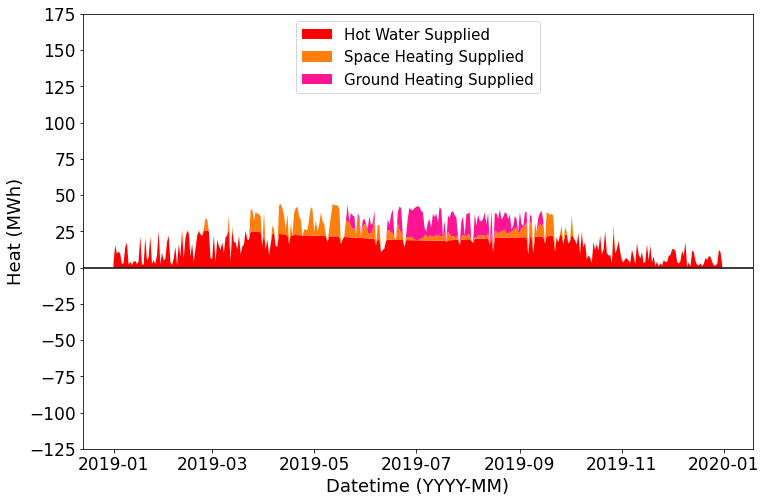

In [103]:
# plot 3.5MW capacity graphs


# net flow graph
plt.figure(figsize=(12,8))
plt.stackplot(pvt35flows["datetime"], pvt35flows["DHW total"], pvt35flows["SH total"], colors =['red', 'tab:orange'], labels = ['Total Hot Water Demand', 'Total Space Heating Demand'])

#plt.stackplot(pvt35flows["datetime"], pvt35flows["panel total"]*(-1), colors =['deeppink'], labels = ['Heat Generated'])
plt.stackplot(pvt35flows["datetime"], pvt35flows["panel total"], colors =['midnightblue'], labels = ['Heat Generated'], alpha=0.6)

plt.plot(pvt35flows["datetime"], pvt35flows["net demand"] - pvt35flows["ground flows"],'--k', label = 'Net Load')
plt.legend(loc=9, prop={'size': 15})
plt.xlabel('Datetime (YYYY-MM)',fontsize=18)
plt.ylabel('Heat (MWh)',fontsize=18)
plt.yticks(np.arange(-125, 200, 25.0), fontsize=17)
plt.xticks(fontsize=17)
plt.axhline(y=0, c='k')


# excess demand graph
plt.figure(figsize=(12,8))
plt.stackplot(pvt35flows["datetime"], pvt35flows["DHW total"] - pvt35flows["DHW excess"], pvt35flows["SH total"] - pvt35flows["SH excess"], pvt35flows["ground flows"], colors =['red', 'tab:orange', 'deeppink'], labels = ['Hot Water Supplied', 'Space Heating Supplied', 'Ground Heating Supplied'])
plt.legend(loc=9, prop={'size': 15})
plt.xlabel('Datetime (YYYY-MM)',fontsize=18)
plt.ylabel('Heat (MWh)',fontsize=18)
plt.yticks(np.arange(-125, 200, 25.0), fontsize=17)
plt.xticks(fontsize=17)
plt.axhline(y=0, c='k')


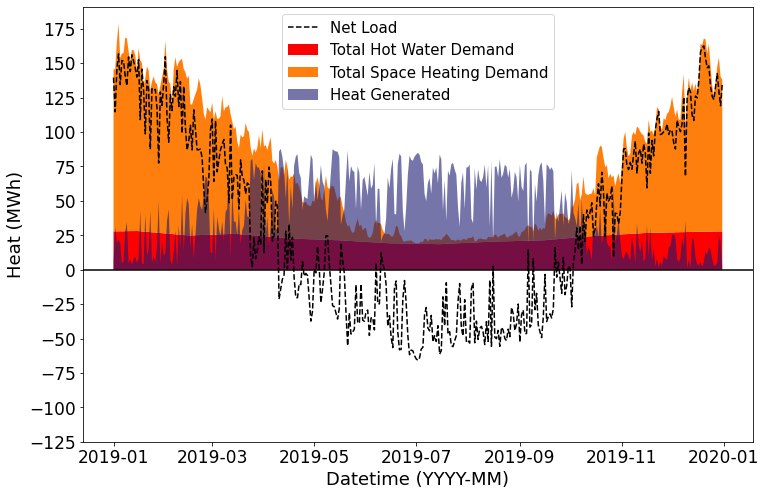

In [104]:
# plot 7MW capacity graphs


# net flow graph
plt.figure(figsize=(12,8))
plt.stackplot(pvt35flows["datetime"], pvt7flows["DHW total"], pvt7flows["SH total"], colors =['red', 'tab:orange'], labels = ['Total Hot Water Demand', 'Total Space Heating Demand'])

#plt.stackplot(pvt35flows["datetime"], pvt35flows["panel total"]*(-1), colors =['deeppink'], labels = ['Heat Generated'])
plt.stackplot(pvt35flows["datetime"], pvt7flows["panel total"], colors =['midnightblue'], labels = ['Heat Generated'], alpha=0.6)

plt.plot(pvt35flows["datetime"], pvt7flows["net demand"] - pvt7flows["ground flows"],'--k', label = 'Net Load')
plt.legend(loc=9, prop={'size': 15})
plt.xlabel('Datetime (YYYY-MM)',fontsize=18)
plt.ylabel('Heat (MWh)',fontsize=18)
plt.yticks(np.arange(-125, 200, 25.0), fontsize=17)
plt.xticks(fontsize=17)
plt.axhline(y=0, c='k')


# excess demand graph
plt.figure(figsize=(12,8))
plt.stackplot(pvt35flows["datetime"], pvt7flows["DHW total"] - pvt7flows["DHW excess"], pvt7flows["SH total"] - pvt7flows["SH excess"], pvt7flows["ground flows"], colors =['red', 'tab:orange', 'deeppink'], labels = ['Hot Water Supplied', 'Space Heating Supplied', 'Ground Heating Supplied'])
plt.legend(loc=9, prop={'size': 15})
plt.xlabel('Datetime (YYYY-MM)',fontsize=18)
plt.ylabel('Heat (MWh)',fontsize=18)
plt.yticks(np.arange(-125, 200, 25.0), fontsize=17)
plt.xticks(fontsize=17)
plt.axhline(y=0, c='k')


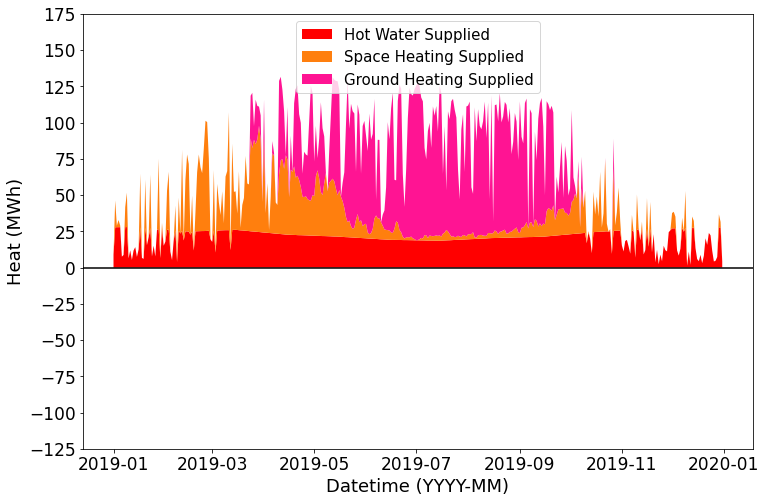

In [105]:
# plot 10.5MW capacity graphs


# net flow graph
plt.figure(figsize=(12,8))
plt.stackplot(pvt35flows["datetime"], pvt105flows["DHW total"], pvt105flows["SH total"], colors =['red', 'tab:orange'], labels = ['Total Hot Water Demand', 'Total Space Heating Demand'])

#plt.stackplot(pvt35flows["datetime"], pvt35flows["panel total"]*(-1), colors =['deeppink'], labels = ['Heat Generated'])
plt.stackplot(pvt35flows["datetime"], pvt105flows["panel total"], colors =['midnightblue'], labels = ['Heat Generated'], alpha=0.6)

plt.plot(pvt35flows["datetime"], pvt105flows["net demand"] - pvt105flows["ground flows"],'--k', label = 'Net Load')
plt.legend(loc=9, prop={'size': 15})
plt.xlabel('Datetime (YYYY-MM)',fontsize=18)
plt.ylabel('Heat (MWh)',fontsize=18)
plt.yticks(np.arange(-125, 200, 25.0), fontsize=17)
plt.xticks(fontsize=17)
plt.axhline(y=0, c='k')


# excess demand graph
plt.figure(figsize=(12,8))
plt.stackplot(pvt35flows["datetime"], pvt105flows["DHW total"] - pvt105flows["DHW excess"], pvt105flows["SH total"] - pvt105flows["SH excess"], pvt105flows["ground flows"], colors =['red', 'tab:orange', 'deeppink'], labels = ['Hot Water Supplied', 'Space Heating Supplied', 'Ground Heating Supplied'])
plt.legend(loc=9, prop={'size': 15})
plt.xlabel('Datetime (YYYY-MM)',fontsize=18)
plt.ylabel('Heat (MWh)',fontsize=18)
plt.yticks(np.arange(-125, 200, 25.0), fontsize=17)
plt.xticks(fontsize=17)
plt.axhline(y=0, c='k')